In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.isna().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
df = df.dropna()

In [8]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
released_df = df['released'].str.split(' ',n = 3,expand = True)
released_df.rename(columns={0: 'month', 1: 'day', 2: 'year', 3: 'country'}, inplace = True)

# Add new columns to df
df['released_year'] = released_df['year']
df['released_month'] = released_df['month']
df['released_day'] = released_df['day']

# 'released_year' will replace 'year'
df.drop(['year'], axis = 1, inplace = True)

In [10]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_day
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,June,"13,"
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,July,"2,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,June,"20,"
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,July,"2,"
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,July,"25,"


In [11]:
df['company'].astype(str).drop_duplicates().sort_values(ascending=False).head()

7129        thefyzz
5664    micro_scope
4007       i5 Films
6793     i am OTHER
6420           erbp
Name: company, dtype: object

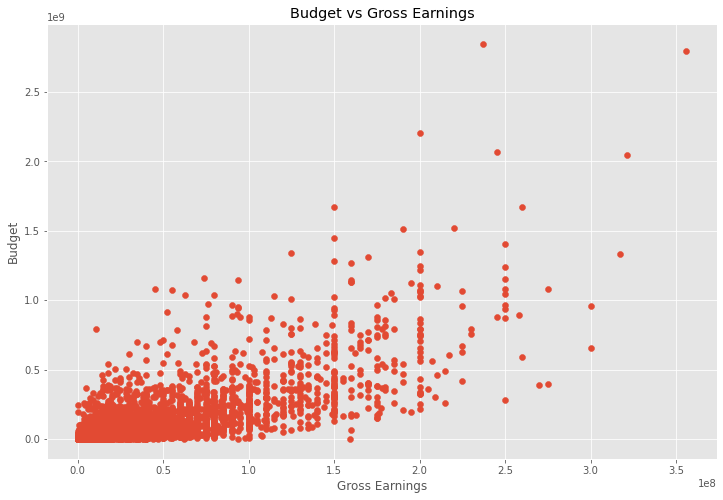

In [12]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.title('Budget vs Gross Earnings')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:422: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(grid, yhat, **kws)


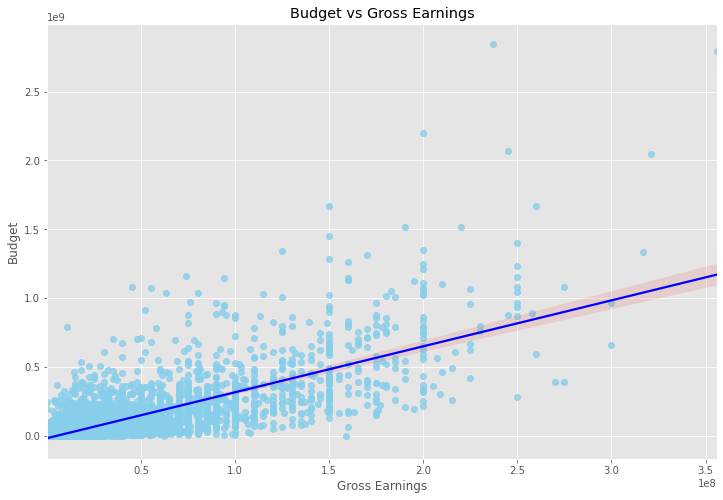

In [13]:
sns.regplot(data = df, x='budget', y='gross', scatter_kws = {"color":'skyblue'}, line_kws = {"Color":"Blue"})
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.title('Budget vs Gross Earnings')
plt.show()

In [14]:
sns.color_palette("crest", as_cmap=True)

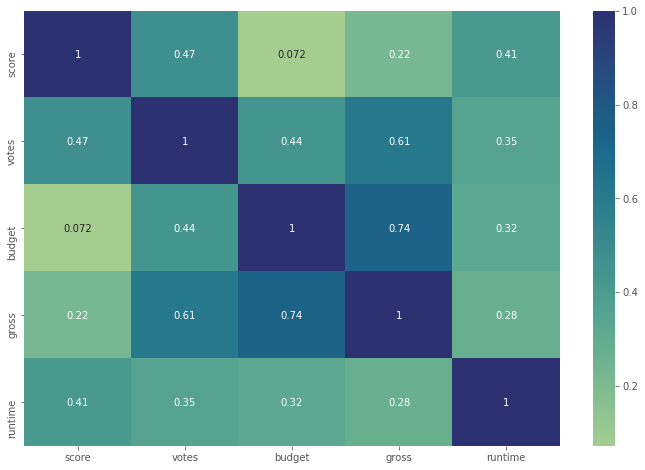

In [15]:
sns.heatmap(df.corr('pearson'), annot= True,cmap='crest')
plt.show()

In [16]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_day
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,2,11,7
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,2,10,19
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,2,11,20
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,2,10,19
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,2,10,26


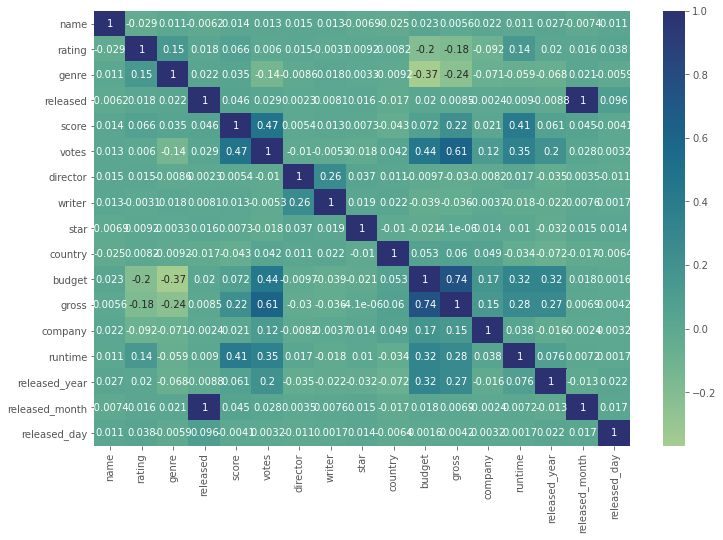

In [17]:
sns.heatmap(df_numerized.corr('pearson'), annot= True,cmap='crest')
plt.show()

In [23]:
df_numerized.shape

(5421, 17)

In [18]:
correlation_mat = df_numerized.corr('pearson')
corr_pairs = correlation_mat.unstack()

In [19]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre           budget           -0.368523
budget          genre            -0.368523
gross           genre            -0.244101
genre           gross            -0.244101
budget          rating           -0.203946
rating          budget           -0.203946
gross           rating           -0.181906
rating          gross            -0.181906
votes           genre            -0.135990
genre           votes            -0.135990
company         rating           -0.092357
rating          company          -0.092357
country         released_year    -0.071611
released_year   country          -0.071611
company         genre            -0.071334
genre           company          -0.071334
                released_year    -0.067962
released_year   genre            -0.067962
genre           runtime          -0.059237
runtime         genre            -0.059237
country         score            -0.043051
score           country          -0.043051
writer          budget           -0.039466
budget     

In [20]:
high_corr = sorted_pairs[((sorted_pairs) >= 0.4) & ((sorted_pairs) < 1)]

In [21]:
high_corr

runtime         score             0.414068
score           runtime           0.414068
votes           budget            0.439675
budget          votes             0.439675
votes           score             0.474256
score           votes             0.474256
votes           gross             0.614751
gross           votes             0.614751
budget          gross             0.740247
gross           budget            0.740247
released        released_month    0.996181
released_month  released          0.996181
dtype: float64